# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

In [5]:
# Your code here
import plotly.express as px
fig = px.scatter(student_data, x="Edad", y="Retrasos",color='Edad')

# Displaying the scatter plot
fig.show()


¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*tu explicación aquí*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [6]:
np.cov(student_data.Edad,student_data.Retrasos)


covarianza=student_data['Edad'].cov(student_data['Retrasos'])
correlacion=student_data['Edad'].corr(student_data['Retrasos'])


print(covarianza)
print(correlacion)


-45.56666666666667
-0.9391626886887122


In [7]:
np.cov(student_data.Edad,student_data.Retrasos)


array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [8]:
X=student_data[['Edad']]
Y=student_data[['Retrasos']]

modelolineal=LinearRegression()
modelolineal.fit(X,Y)

interseccion=modelolineal.intercept_
pendiente=modelolineal.coef_[0]

print(interseccion)
print(pendiente)

[12.88880336]
[-0.24282077]


In [ ]:
# your explanation here




Grafica tu modelo de regresión en tu diagrama de dispersión.

<function matplotlib.pyplot.show(close=None, block=None)>

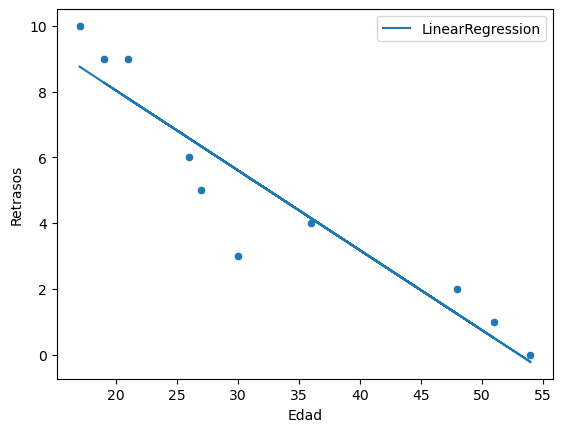

In [9]:
# Your code here.
prediction=modelolineal.predict(X)

#plt.figure(figsize=(8,6))
sns.scatterplot(data=student_data,x='Edad',y='Retrasos')
plt.plot(student_data['Edad'],prediction,label='LinearRegression')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.show

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

*tu explicación aquí*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [11]:
# Your code here.

vehicle_data = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year',  'CO2 Emission Grams/Mile']]
correlation_matrix = vehicle_data.corr()
print(correlation_matrix['CO2 Emission Grams/Mile'])

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [12]:
import statsmodels.api as sm
X = vehicle_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicle_data['CO2 Emission Grams/Mile']

X= sm.add_constant(X)

modelo_co2 = sm.OLS(y,X).fit()
modelo_co2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                             14:04:58   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.
#-Todas las variables tienen un P value inferior a 0.05 por lo que afectan en la predicción
#-Fuel Barrel /Year es la que tiene un impacto más significativo en la predicción


## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [13]:
# Your code here.
invites_data = pd.DataFrame({ 'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13] })


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [14]:
# Your code here.

import plotly.express as px
fig = px.scatter(invites_data, x='X', y='Y', 
                 title='Invitados vs Asistentes',
                 labels={'X': 'Invitados', 'Y': 'Asistentes'},
                 template='plotly_white')

fig.show()

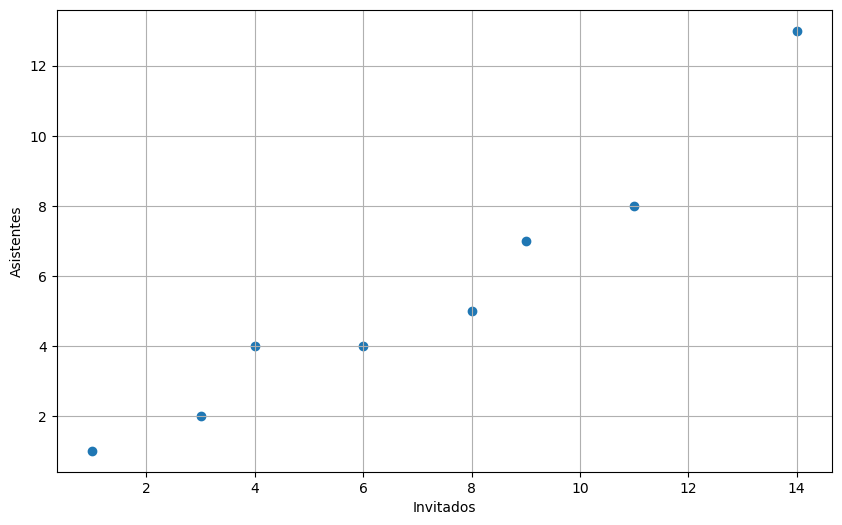

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(invites_data['X'], invites_data['Y'])
plt.xlabel('Invitados')
plt.ylabel('Asistentes')
plt.grid()
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [16]:
# Your response here.
import statsmodels.api as sm
X = invites_data.X
y = invites_data.Y

X= sm.add_constant(X)

modelo_co2 = sm.OLS(y,X).fit()
modelo_co2.summary()

c:\Users\atrig\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           0.000102
Time:                        14:05:19   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
invites_data_outliers = pd.DataFrame({ 'X': [1, 3, 6, 8, 9, 11], 'Y': [1, 2, 4, 5, 7, 8] })

In [18]:
# Your response here.
import statsmodels.api as sm
X = invites_data_outliers.X
y = invites_data_outliers.Y

X= sm.add_constant(X)

modelo_co2 = sm.OLS(y,X).fit()
modelo_co2.summary()

c:\Users\atrig\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           0.000290
Time:                        14:05:24   Log-Likelihood:                -3.2485
No. Observations:                   6   AIC:                             10.50
Df Residuals:                       4   BIC:                             10.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0280      0.435     -0.064      0.952      -1.235       1.179
X              0.7150      0.060     11.857      0.000       0.548       0.882
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.147
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.285
Skew:                          -0.246   Prob(JB):                        0.867
Kurtosis:                       2.052   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

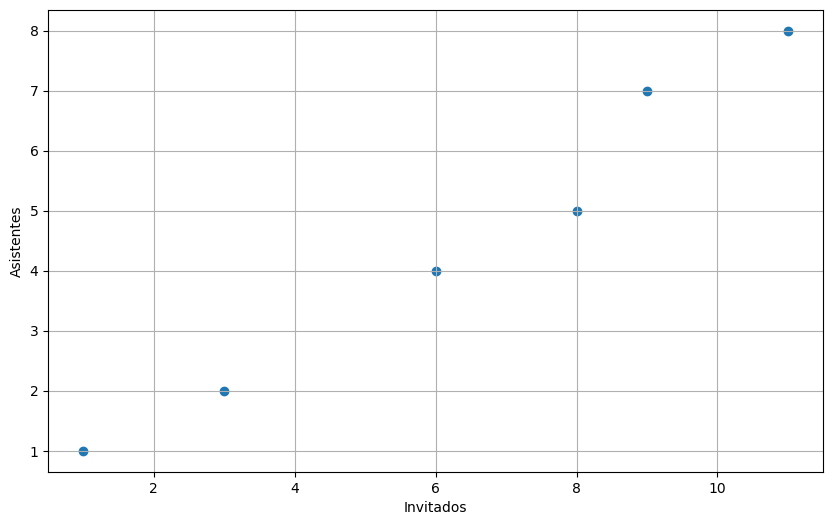

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(invites_data_outliers['X'], invites_data_outliers['Y'])
plt.xlabel('Invitados')
plt.ylabel('Asistentes')
plt.grid()
plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*